In [0]:
pip install --upgrade tensorflow-hub

Requirement already up-to-date: tensorflow-hub in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pylab as plt
from tensorflow.keras import layers

In [0]:
import numpy as np
import PIL.Image as Image
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
classifier_url = "https://tfhub.dev/google/tf2-preview/inception_v3/classification/4"
IMAGE_SHAPE = (1024, 1024)
classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [0]:
michele_location = '/content/gdrive/My Drive/Michele Boyd/micheleboyd_57178257_341325753406991_9208110367956514904_n.jpg'
michele_path = tf.keras.utils.get_file(fname=michele_location, origin='')
michele = Image.open(michele_path).resize(IMAGE_SHAPE)

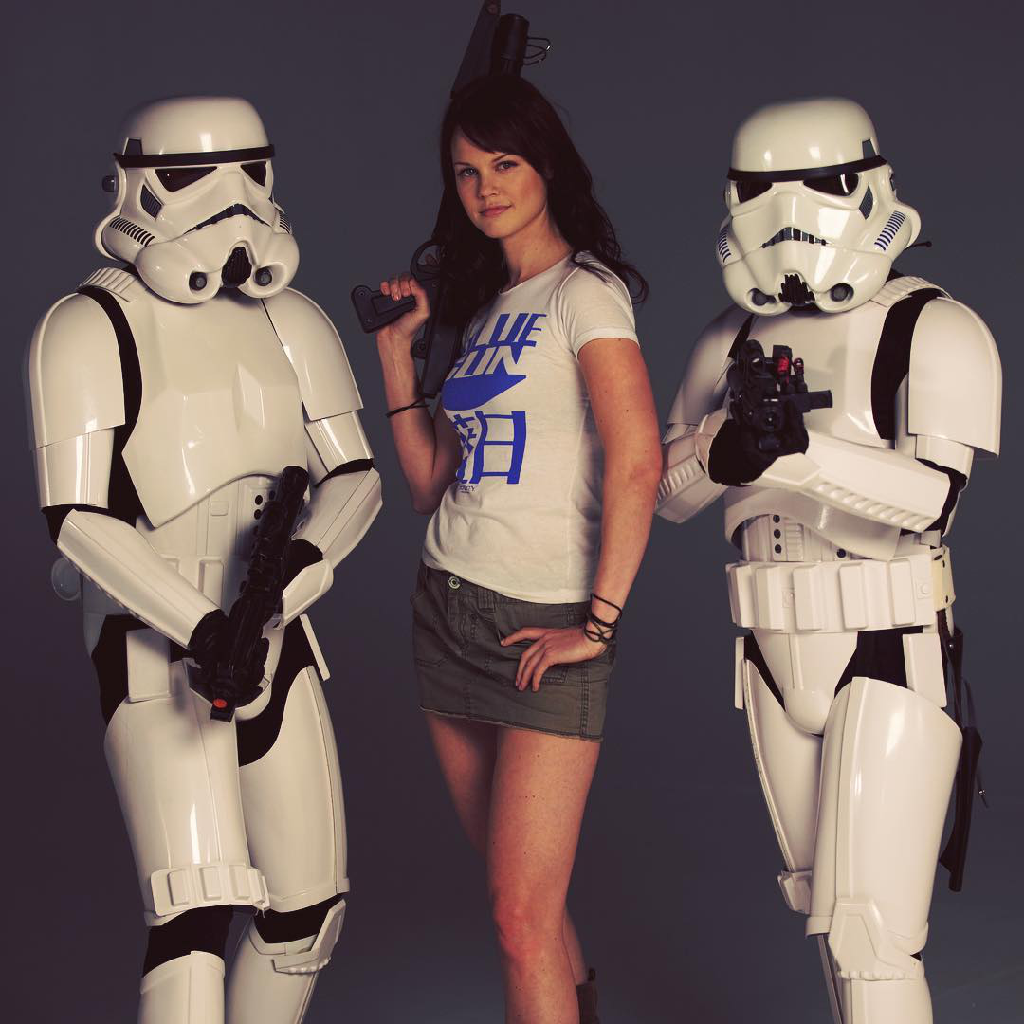

In [0]:
michele

In [0]:
michele = np.array(michele)
# michele = michele.reshape((1, 1024, 1024, 3))
michele.shape

(1024, 1024, 3)

In [0]:
michele_batch = michele.reshape((1, 1024, 1024, 3))
result = classifier.predict(michele_batch, batch_size=1)

In [0]:
result.shape

(1, 1001)

In [0]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

726

In [0]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


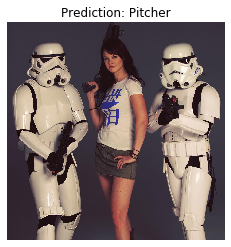

In [0]:
plt.imshow(michele)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())